<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/viz/visualization/notebooks/dataset1_visualization_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

종속변수를 Life_Satisfaction_Score로 놓고 다른 column들과의 시각화

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ak0212/anxiety-and-depression-mental-health-factors")

print("Path to dataset files:", path)

100%|██████████| 21.2k/21.2k [00:00<00:00, 18.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ak0212/anxiety-and-depression-mental-health-factors/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import os

# 파일 경로 지정
csv_path = os.path.join(path, "anxiety_depression_data.csv")  # 실제 파일명을 확인해서 수정해야 해
print(os.listdir(path))
# CSV 불러오기
df = pd.read_csv(csv_path)

# 데이터 확인
df.head()

['anxiety_depression_data.csv']


,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


<ipython-input-36-b9bafa9d3d90>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Life_Satisfaction_Score', data=df, palette=pink_palette, inner='quartile')
<ipython-input-36-b9bafa9d3d90>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education_Level', y='Life_Satisfaction_Score', data=df, palette=pink_palette)
<ipython-input-36-b9bafa9d3d90>:25: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Education_Level', y='Life_Satisfaction_Score', data=df, palette=pink_palette)
<ipython-input-36-b9bafa9d3d90>:31: FutureWarning: 

Passing `palette` without assigning `hue` is depr

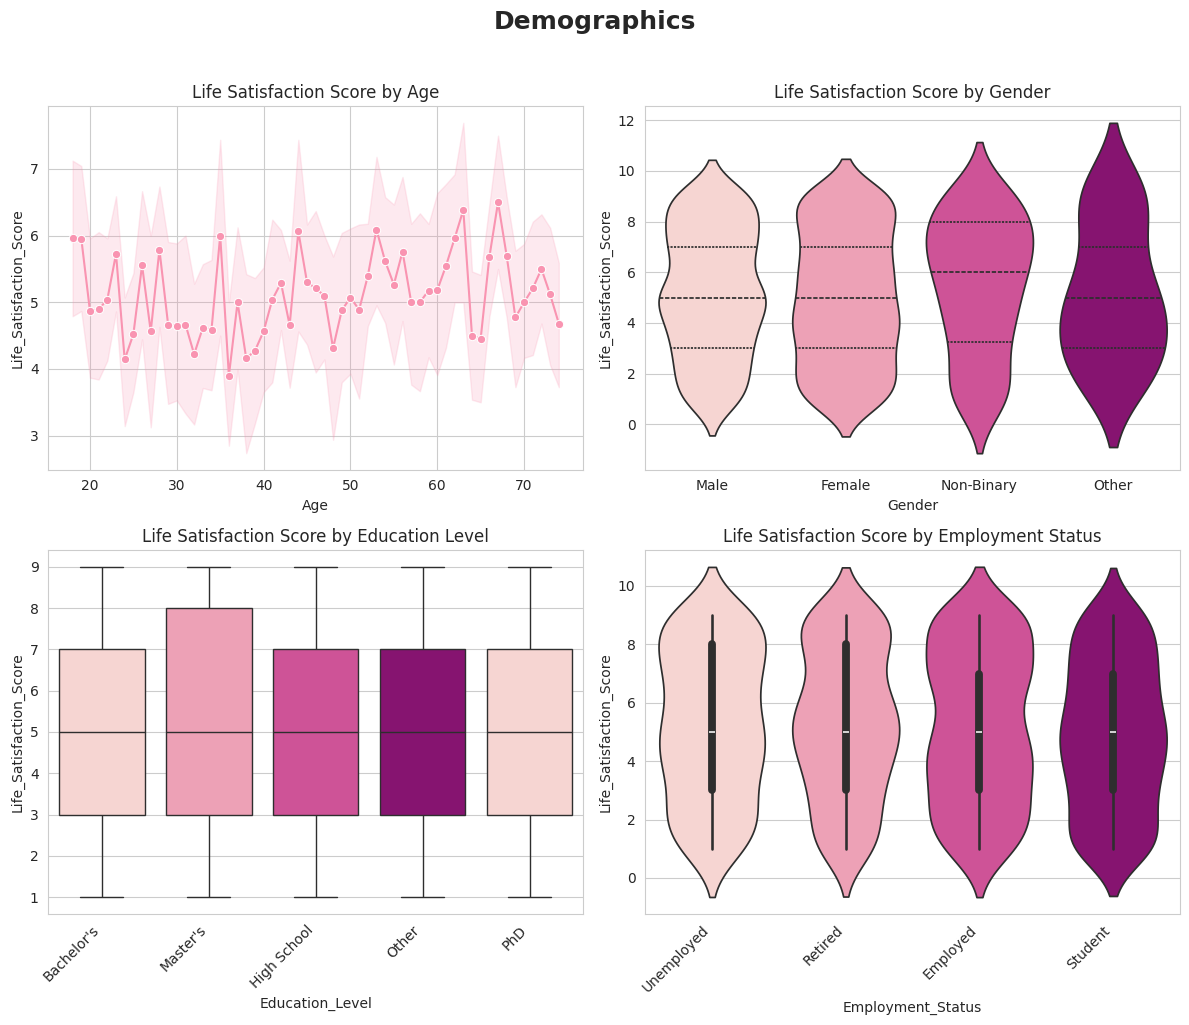

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set_style("whitegrid")
pink_palette = sns.color_palette("RdPu", n_colors=4)

# 시각화
plt.figure(figsize=(12, 10))

plt.suptitle('Demographics', fontsize=18, fontweight='bold', y=1.02)

# 1. Age - Line Plot (이미 적절함)
plt.subplot(2, 2, 1)
sns.lineplot(x='Age', y='Life_Satisfaction_Score', data=df, color=pink_palette[1], marker='o')
plt.title('Life Satisfaction Score by Age')

# 2. Gender - Violin Plot (분포 확인에 더 적합)
plt.subplot(2, 2, 2)
sns.violinplot(x='Gender', y='Life_Satisfaction_Score', data=df, palette=pink_palette, inner='quartile')
plt.title('Life Satisfaction Score by Gender')

# 3. Education Level - Box Plot (순서가 있는 범주형 데이터에 적합)
plt.subplot(2, 2, 3)
sns.boxplot(x='Education_Level', y='Life_Satisfaction_Score', data=df, palette=pink_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Life Satisfaction Score by Education Level')

# 4. Employment Status - Violin Plot (분포와 밀도 확인에 적합)
plt.subplot(2, 2, 4)
sns.violinplot(x='Employment_Status', y='Life_Satisfaction_Score', data=df, palette=pink_palette, inner='box')
plt.xticks(rotation=45, ha='right')
plt.title('Life Satisfaction Score by Employment Status')

plt.tight_layout()
plt.show()


<ipython-input-18-39ecab56eaf1>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Social_Support_Score',


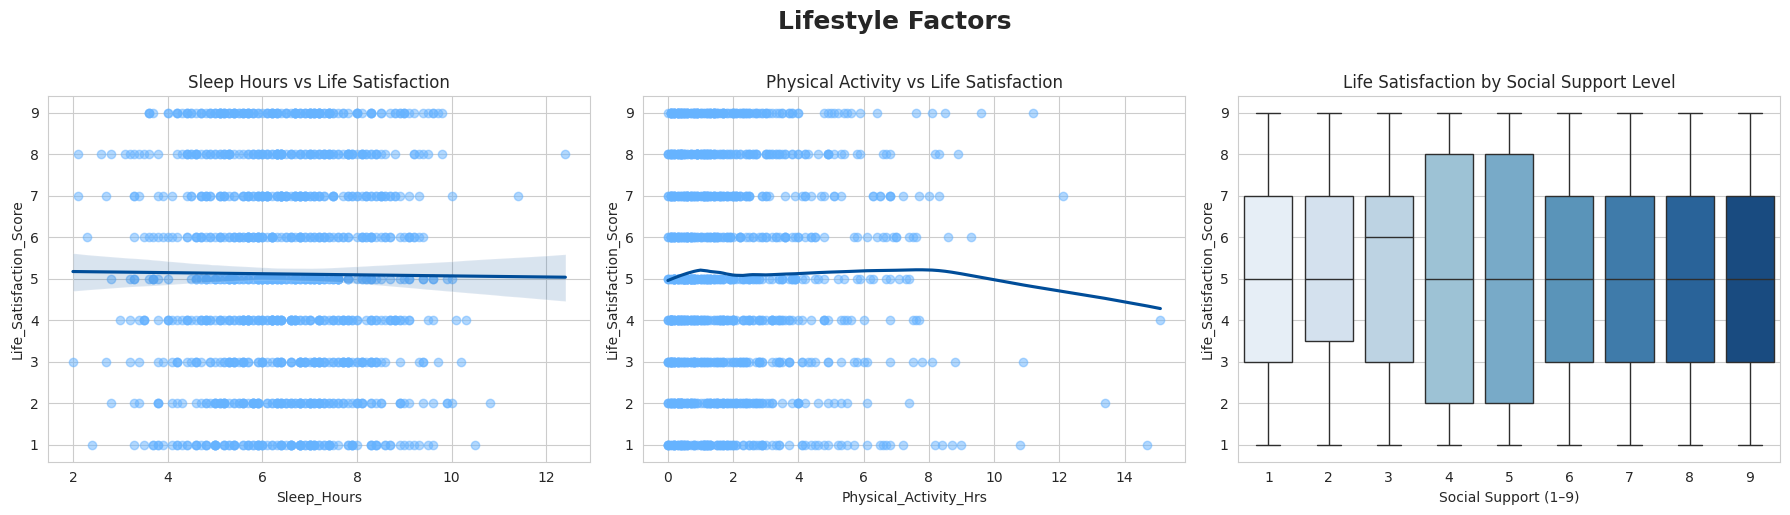

In [ ]:
# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

plt.suptitle('Lifestyle Factors', fontsize=18, fontweight='bold', y=1.02)

# 1. 연속형 변수: Sleep_Hours vs Life_Satisfaction_Score
plt.subplot(1, 3, 1)
sns.regplot(x='Sleep_Hours',
            y='Life_Satisfaction_Score',
            data=df,
            scatter_kws={'alpha':0.5, 'color': '#66b3ff'},   # 시원한 파란색
            line_kws={'color': '#004d99'},                   # 더 뮤트된 파란색
            ci=95)                                           # 신뢰구간 표시
plt.title('Sleep Hours vs Life Satisfaction')

# 2. 연속형 변수: Physical_Activity vs Life_Satisfaction_Score
plt.subplot(1, 3, 2)
sns.regplot(x='Physical_Activity_Hrs',
            y='Life_Satisfaction_Score',
            data=df,
            scatter_kws={'alpha':0.5, 'color': '#66b3ff'},   # 시원한 파란색
            line_kws={'color': '#004d99'},                   # 더 뮤트된 파란색
            lowess=True)                                     # 부드러운 로우에스 회귀
plt.title('Physical Activity vs Life Satisfaction')

# 3. 정수형 변수: Social_Support vs Life_Satisfaction_Score (Boxplot)
plt.subplot(1, 3, 3)
sns.boxplot(x='Social_Support_Score',
            y='Life_Satisfaction_Score',
            data=df,
            palette='Blues')                               # 푸른 계열 색상 팔레트
plt.title('Life Satisfaction by Social Support Level')
plt.xlabel('Social Support (1–9)')

plt.tight_layout()
plt.show()


<ipython-input-20-488cf484a4b8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level',


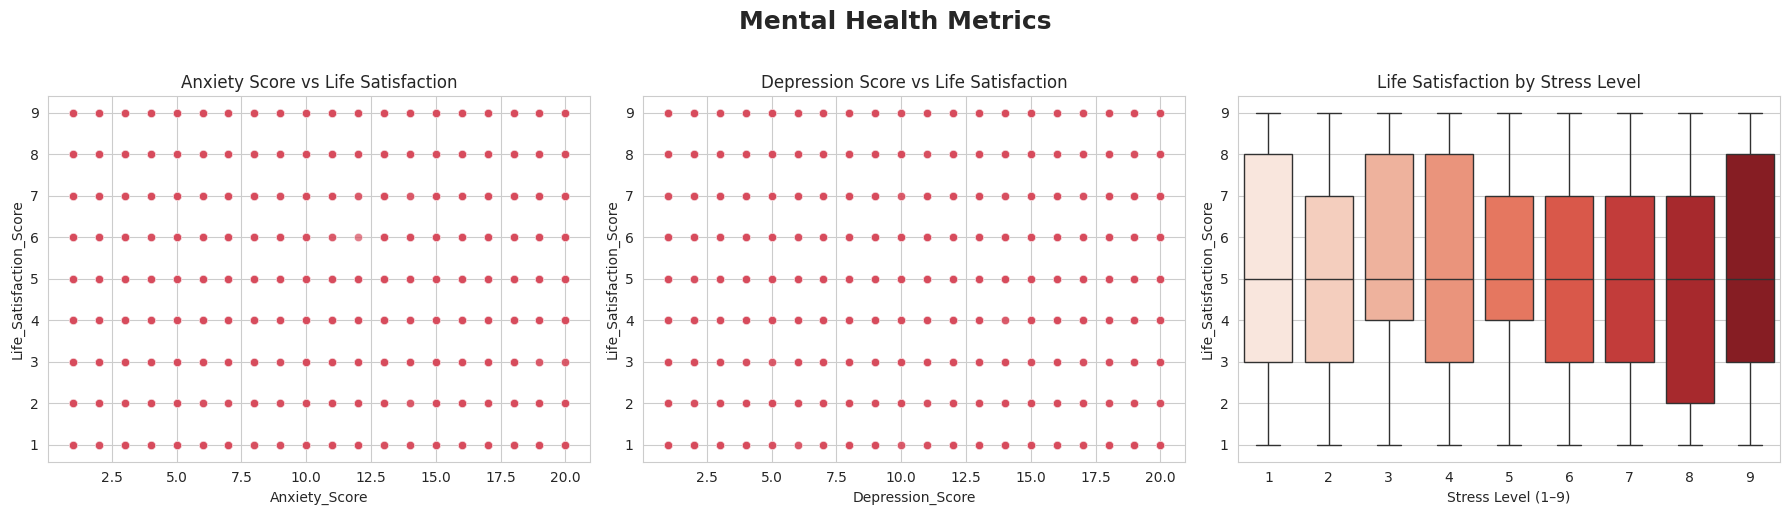

In [ ]:
# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

plt.suptitle('Mental Health Metrics', fontsize=18, fontweight='bold', y=1.02)

# 1. Anxiety Score vs Life Satisfaction
plt.subplot(1, 3, 1)
sns.scatterplot(x='Anxiety_Score',
                y='Life_Satisfaction_Score',
                data=df,
                color='#D74B5C',      # 붉은색 계열
                alpha=0.7)           # 투명도 설정
plt.title('Anxiety Score vs Life Satisfaction')

# 2. Depression Score vs Life Satisfaction
plt.subplot(1, 3, 2)
sns.scatterplot(x='Depression_Score',
                y='Life_Satisfaction_Score',
                data=df,
                color='#D74B5C',      # 붉은색 계열
                alpha=0.7)           # 투명도 설정
plt.title('Depression Score vs Life Satisfaction')

# 3. Stress Level vs Life Satisfaction (Boxplot)
plt.subplot(1, 3, 3)
sns.boxplot(x='Stress_Level',
            y='Life_Satisfaction_Score',
            data=df,
            palette='Reds')       # 붉은색 팔레트 사용
plt.title('Life Satisfaction by Stress Level')
plt.xlabel('Stress Level (1–9)')

plt.tight_layout()
plt.show()


<ipython-input-26-b71b85e9993d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-26-b71b85e9993d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-26-b71b85e9993d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


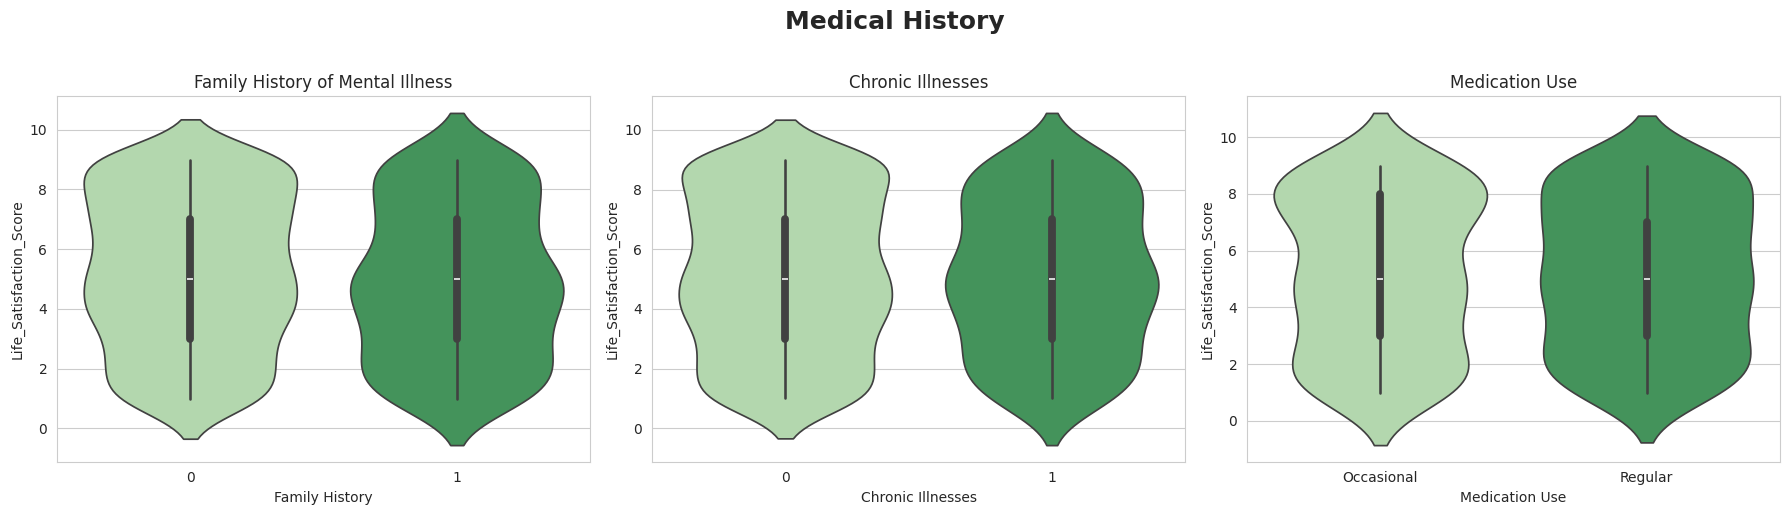

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))
plt.suptitle('Medical History', fontsize=18, fontweight='bold', y=1.02)

# 1. Family History of Mental Illness vs Life Satisfaction
plt.subplot(1, 3, 1)
sns.violinplot(
    x='Family_History_Mental_Illness',
    y='Life_Satisfaction_Score',
    data=df,
    palette='Greens',
    inner='box'  # 중앙값과 사분위수 정보를 함께 표시
)
plt.title('Family History of Mental Illness')
plt.xlabel('Family History')

# 2. Chronic Illnesses vs Life Satisfaction
plt.subplot(1, 3, 2)
sns.violinplot(
    x='Chronic_Illnesses',
    y='Life_Satisfaction_Score',
    data=df,
    palette='Greens',
    inner='box'
)
plt.title('Chronic Illnesses')
plt.xlabel('Chronic Illnesses')

# 3. Medication Use vs Life Satisfaction
plt.subplot(1, 3, 3)
sns.violinplot(
    x='Medication_Use',
    y='Life_Satisfaction_Score',
    data=df,
    palette='Greens',
    inner='box'
)
plt.title('Medication Use')
plt.xlabel('Medication Use')

plt.tight_layout()
plt.show()


<ipython-input-25-1fb230f5bbfa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


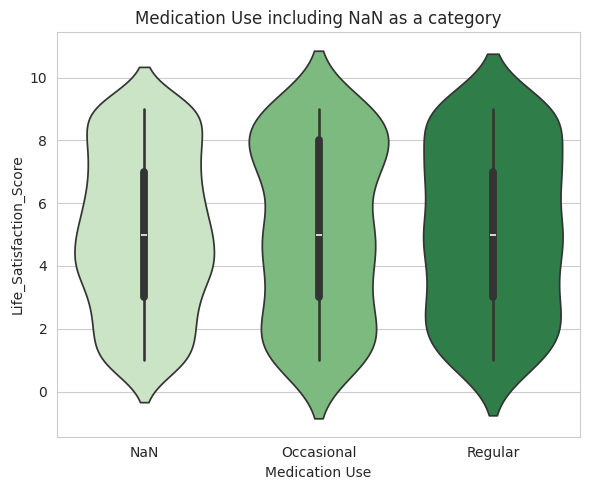

In [ ]:
# NaN을 문자열 'NaN'으로 변환해 새로운 컬럼 생성 - NaN이 너무 많아서..(약안먹는사람들)
df['Medication_Use_filled'] = df['Medication_Use'].fillna('NaN')

plt.figure(figsize=(6, 5))
sns.violinplot(
    x='Medication_Use_filled',
    y='Life_Satisfaction_Score',
    data=df,
    palette='Greens',
    inner='box'
)
plt.title('Medication Use including NaN as a category')
plt.xlabel('Medication Use')
plt.tight_layout()
plt.show()



<ipython-input-29-7a7c78199591>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-29-7a7c78199591>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-29-7a7c78199591>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


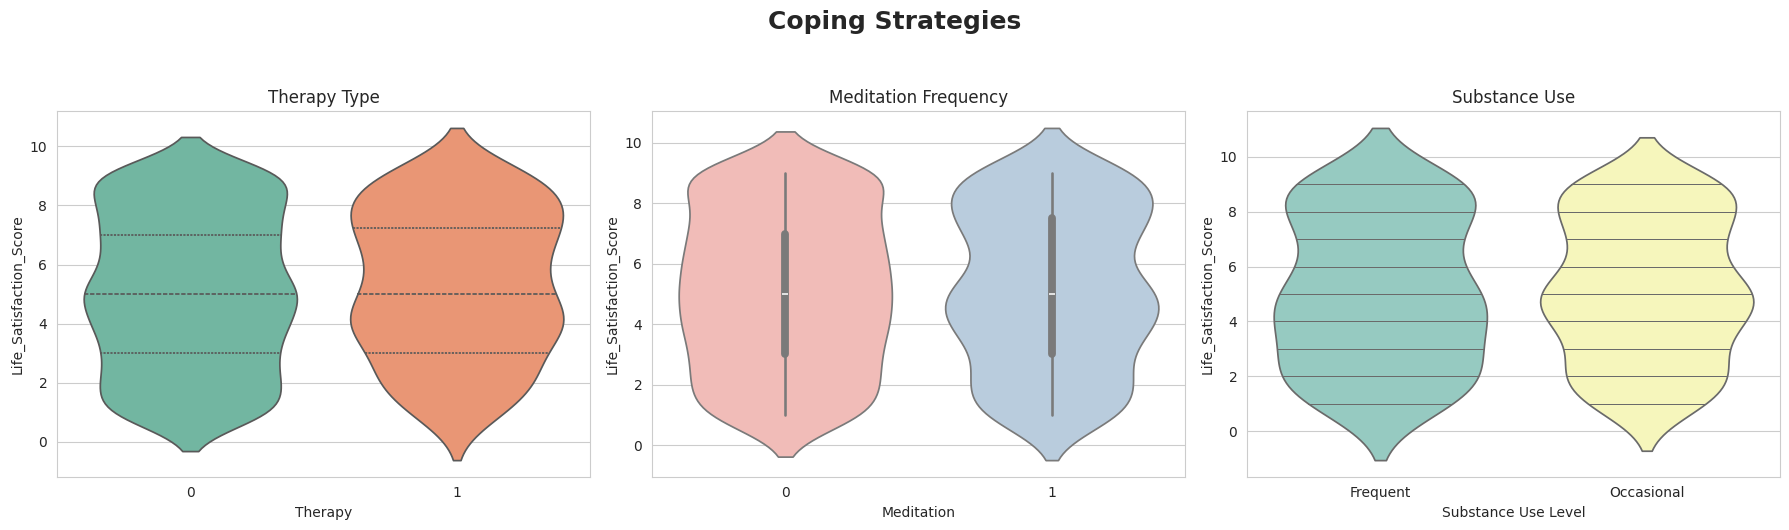

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))
plt.suptitle('Coping Strategies', fontsize=18, fontweight='bold', y=1.05)

# 1. Therapy vs Life Satisfaction (Set2 팔레트)
plt.subplot(1, 3, 1)
sns.violinplot(
    x='Therapy',  # 수정됨: Therapy_Type → Therapy
    y='Life_Satisfaction_Score',
    data=df,
    palette='Set2',
    inner='quartile'
)
plt.title('Therapy Type')
plt.xlabel('Therapy')

# 2. Meditation vs Life Satisfaction (Pastel1 팔레트)
plt.subplot(1, 3, 2)
sns.violinplot(
    x='Meditation',  # 수정됨: Meditation_Frequency → Meditation
    y='Life_Satisfaction_Score',
    data=df,
    palette='Pastel1',
    inner='box'
)
plt.title('Meditation Frequency')
plt.xlabel('Meditation')

# 3. Substance Use vs Life Satisfaction (Set3 팔레트)
plt.subplot(1, 3, 3)
sns.violinplot(
    x='Substance_Use',  # 올바름
    y='Life_Satisfaction_Score',
    data=df,
    palette='Set3',
    inner='stick'
)
plt.title('Substance Use')
plt.xlabel('Substance Use Level')

plt.tight_layout()
plt.show()


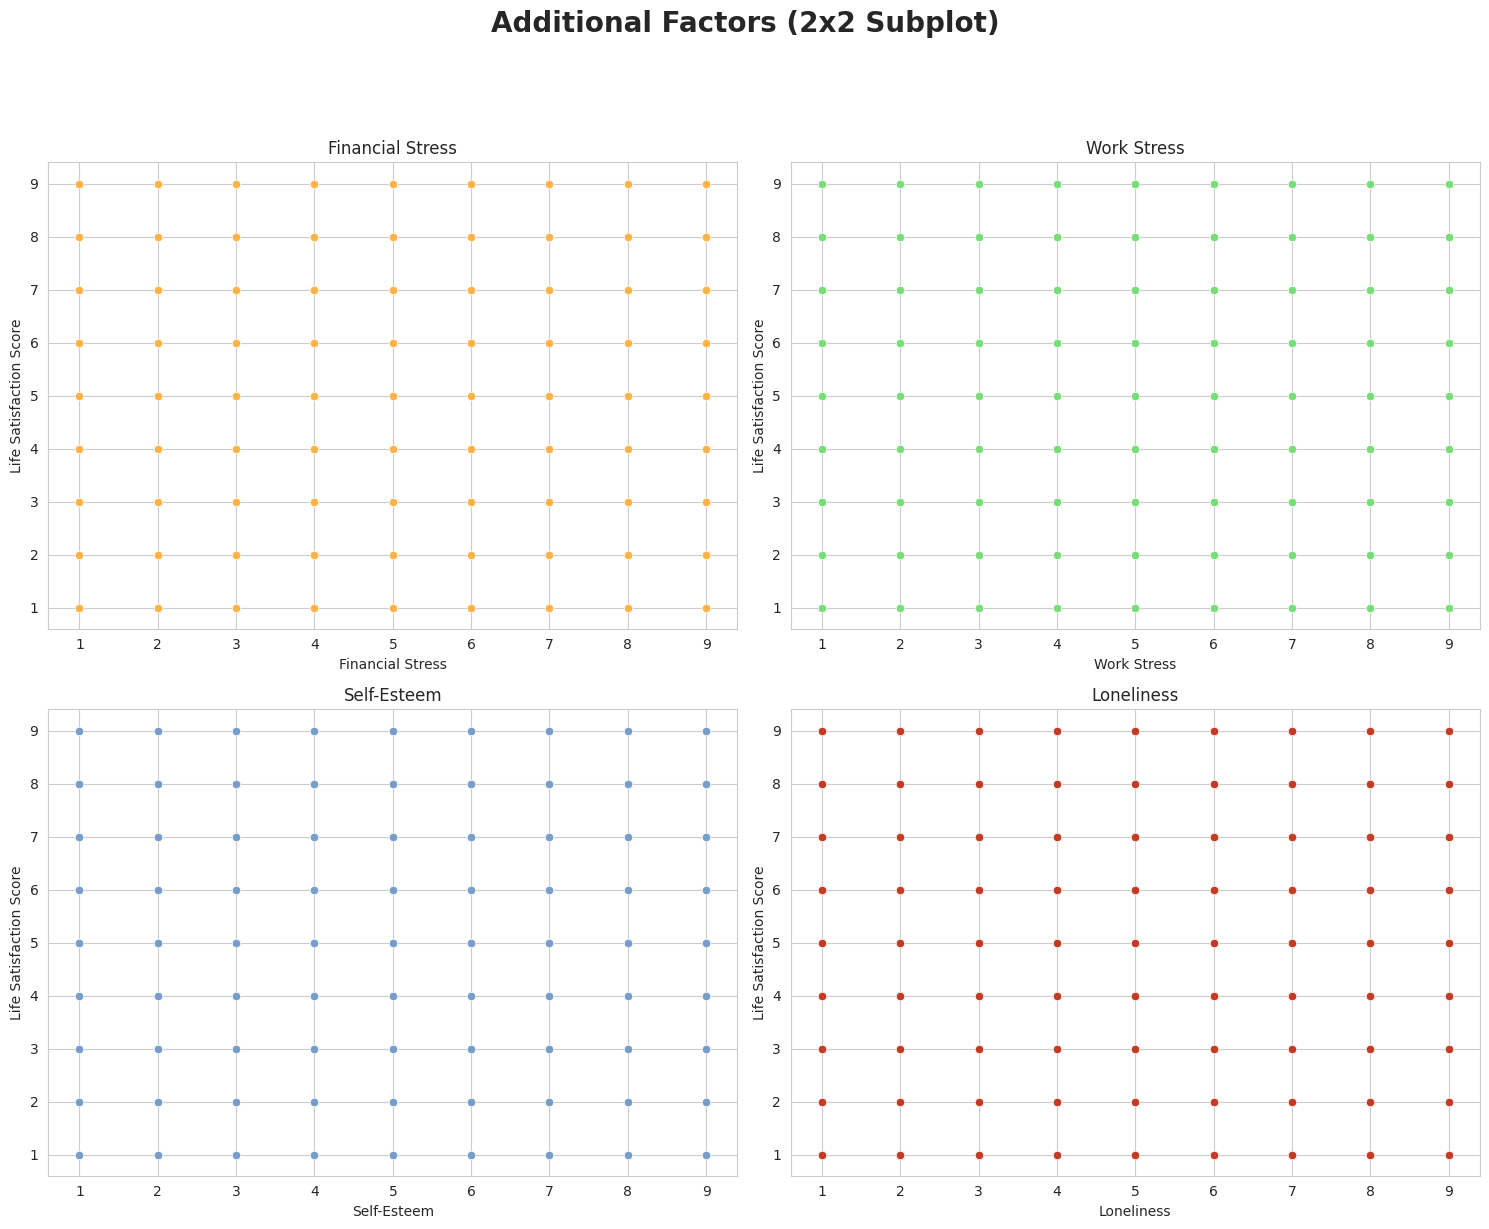

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Additional Factors (2x2 Subplot)', fontsize=20, fontweight='bold', y=1.02)

# Financial Stress vs Life Satisfaction
sns.scatterplot(
    x='Financial_Stress',
    y='Life_Satisfaction_Score',
    data=df,
    ax=axes[0, 0],
    color='#FFB347'  # 주황색
)
axes[0, 0].set_title('Financial Stress')
axes[0, 0].set_xlabel('Financial Stress')
axes[0, 0].set_ylabel('Life Satisfaction Score')

# Work Stress vs Life Satisfaction
sns.scatterplot(
    x='Work_Stress',
    y='Life_Satisfaction_Score',
    data=df,
    ax=axes[0, 1],
    color='#77DD77'  # 초록색
)
axes[0, 1].set_title('Work Stress')
axes[0, 1].set_xlabel('Work Stress')
axes[0, 1].set_ylabel('Life Satisfaction Score')

# Self Esteem vs Life Satisfaction
sns.scatterplot(
    x='Self_Esteem_Score',  # 코드에서 제공된 컬럼명 사용
    y='Life_Satisfaction_Score',
    data=df,
    ax=axes[1, 0],
    color='#779ECB'  # 파란색
)
axes[1, 0].set_title('Self-Esteem')
axes[1, 0].set_xlabel('Self-Esteem')
axes[1, 0].set_ylabel('Life Satisfaction Score')

# Loneliness vs Life Satisfaction
sns.scatterplot(
    x='Loneliness_Score',  # 코드에서 제공된 컬럼명 사용
    y='Life_Satisfaction_Score',
    data=df,
    ax=axes[1, 1],
    color='#C23B22'  # 빨간색
)
axes[1, 1].set_title('Loneliness')
axes[1, 1].set_xlabel('Loneliness')
axes[1, 1].set_ylabel('Life Satisfaction Score')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
